# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
logins = pd.read_json("../input/ultimate-data-challenge/logins.json")
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
print(logins.dtypes)
print(logins.isna().sum())
logins.set_index('login_time', inplace=True)

login_time    datetime64[ns]
dtype: object
login_time    0
dtype: int64


In [4]:
logins['count'] = 1
agg_logins = logins.resample('15T').sum()
agg_logins

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


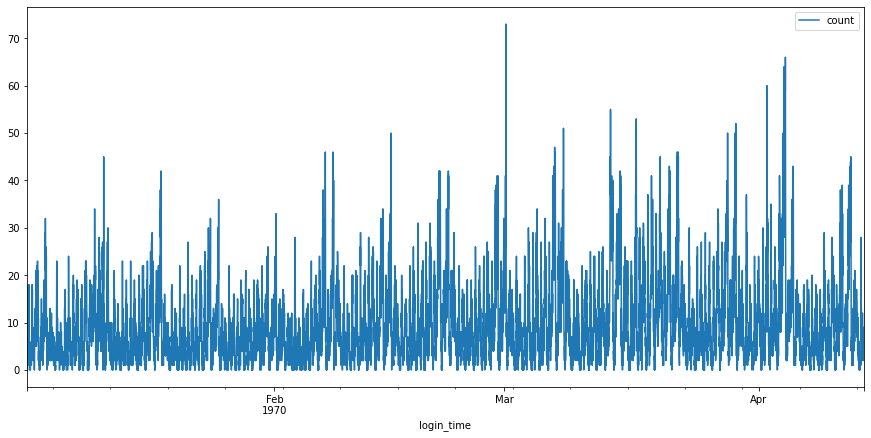

In [5]:
plt.rcParams["figure.figsize"] = (15,7)
agg_logins.plot();

Not much can be seen in the plot above, but it seems there is a pattern of increasing and decreasing logins.

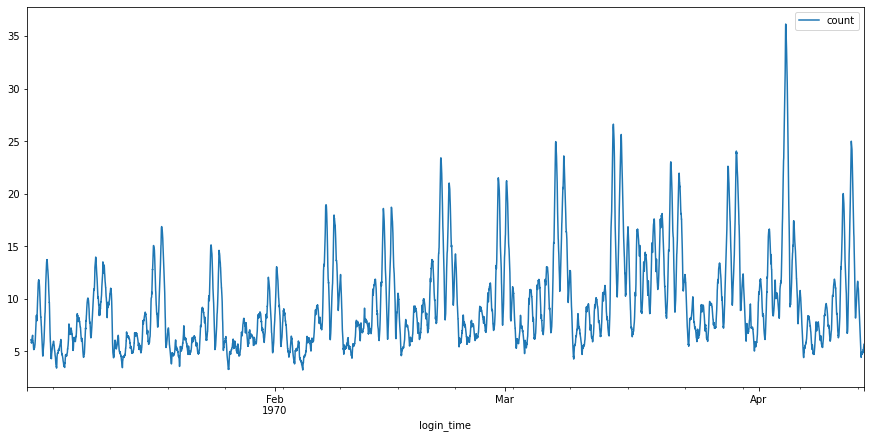

In [6]:
agg_logins.rolling(window=50).mean().plot();

From the plot above, it can now be seen that there are times when less people login and times when more people login.

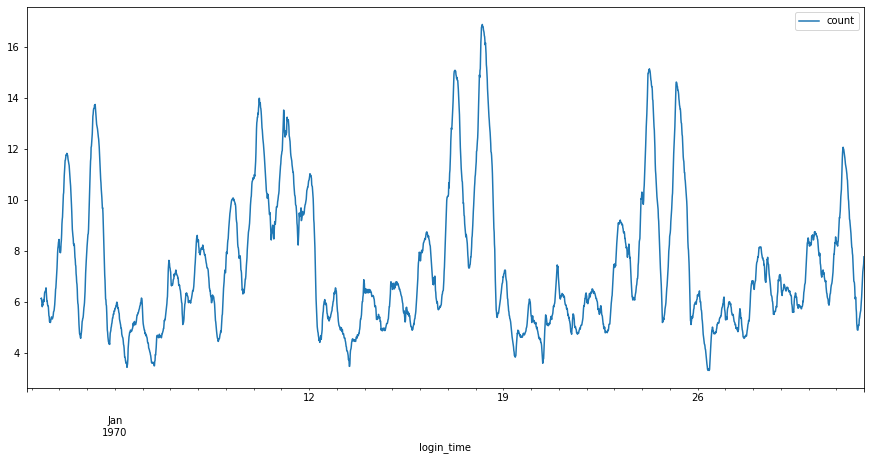

In [7]:
import datetime

# logins for January
agg_logins.loc['1970-01'].rolling(window=50).mean().plot();

In [8]:
print(datetime.datetime(1970, 1, 9).isoweekday())
print(datetime.datetime(1970, 1, 10).isoweekday())

5
6


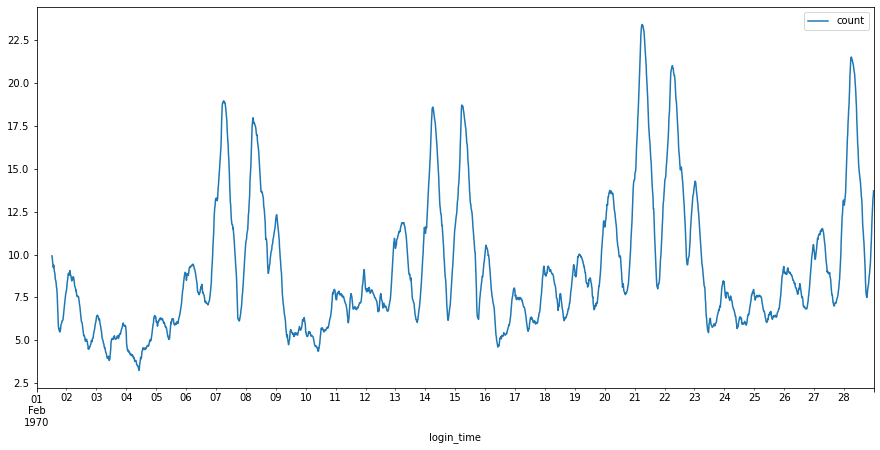

In [9]:
# Logins for February
agg_logins.loc['1970-02'].rolling(window=50).mean().plot();

In [10]:
print(datetime.datetime(1970, 2, 7).isoweekday())
print(datetime.datetime(1970, 2, 8).isoweekday())

6
7


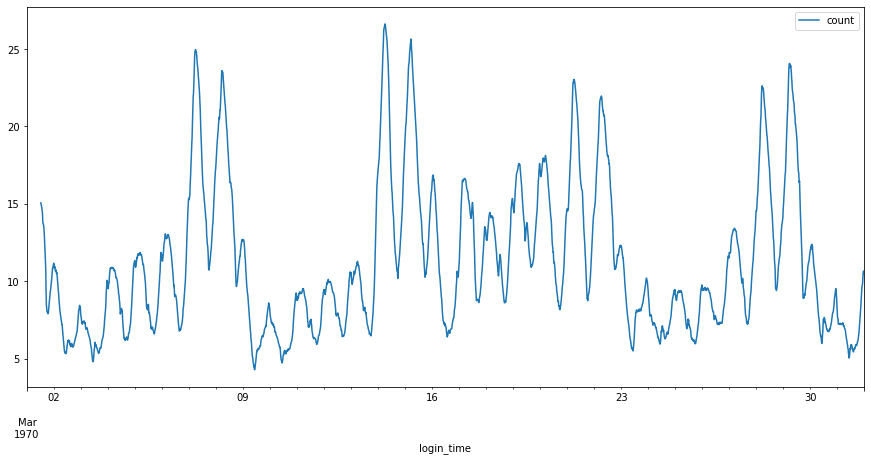

In [11]:
# Logins for March
agg_logins.loc['1970-03'].rolling(window=50).mean().plot();

In [12]:
print(datetime.datetime(1970, 3, 7).isoweekday())
print(datetime.datetime(1970, 3, 8).isoweekday())

6
7


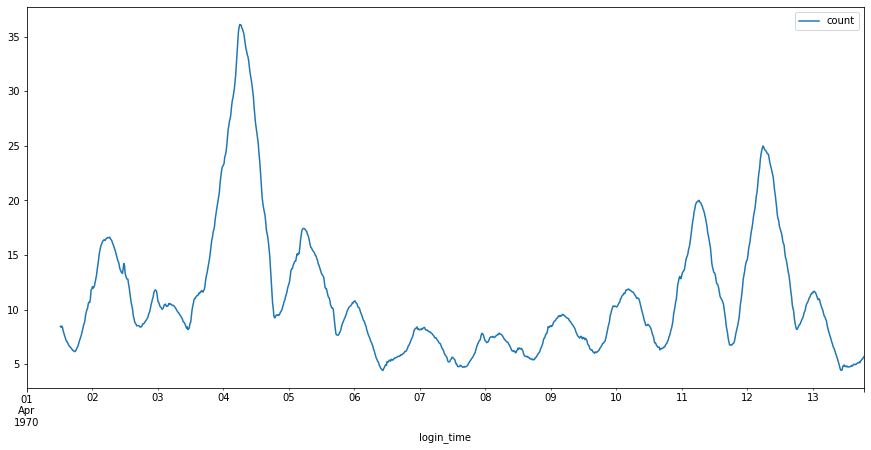

In [13]:
# Logins for April
agg_logins.loc['1970-04'].rolling(window=50).mean().plot();

In [14]:
print(datetime.datetime(1970, 4, 4).isoweekday())
print(datetime.datetime(1970, 4, 12).isoweekday())

6
7


### From the four plots above it can be seen taht in all months, January through April, there is a surge of logins every 7 days during the weekends.

# Part 2

#### The driving factor in this experiment is how much a driver will make to give a ride. If Ultimate were to charge riders more when the city is the most active then they can afford to pay the drivers more and pay for the toll expenses. I would choose the percentage of drivers using the toll as the metric for this experiment because if more drivers use the toll then that means driving partners are not being exclusive to each city.

#### For the experiment I would send out a survey to all the drivers and ask them 2 questions: <br> 1. Do they currently take the toll road to give more rides in another city during peak hours? <br>2. Would they take the toll to give rides in another city during peak hours if Ultimate reimbursed their toll expenses?

#### I would conduct a hypothesis test to test to compare the percentage of drivers using the toll to give rides in another city during peak hours. The null hypothesis would be that the percentage of drives would be the same regardless if the toll expenses were reimbursed.

#### If the null hypothesis is rejected then I would recommend the city operations teams to go forward with letting drivers know of the change (tolls will be reimbursed during peak hours in the adjacent city) and I would advise them to watch revenue and expenses so they can adjust our prices in the future to stay profitable.

# Part 3

In [15]:
df = pd.read_json("../input/ultimate-data-challenge/ultimate_data_challenge.json")
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### For now I will not drop the avg_rating_of_driver and avg_rating_by_driver so I can do EDA first.

In [17]:
# change date columns from object data type to datatime data type
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [18]:
df['last_trip_date'].describe(datetime_is_numeric=True)

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [19]:
# Latest trip date is July 1st so I will check for users that took their last trip in June and classify them as retained users.
percent_retained = (df['last_trip_date'] >= '2014-06-01').sum() / len(df['last_trip_date'])
print('{}% of users were retained.'.format(round(percent_retained*100, 2)))

# Create retained column
df['retained'] = df['last_trip_date'] >= '2014-06-01'
df['retained'].replace(True, 1, inplace=True)
df['retained'].replace(False, 0, inplace=True)

37.61% of users were retained.


In [20]:
# Change ultimate black user column to 0's and 1's
df['ultimate_black_user'].replace(True, 1, inplace=True)
df['ultimate_black_user'].replace(False, 0, inplace=True)

In [21]:
# Check value counts for phone
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [22]:
# The majority are iPhone so I will fill the null values with iPhone
df['phone'].replace(to_replace=np.nan, value='iPhone', inplace=True)

# Replace iPhone as 1 and Android as 0
df['phone'].replace(to_replace='iPhone', value=1, inplace=True)
df['phone'].replace(to_replace='Android', value=0, inplace=True)
df['phone'] = df['phone'].astype(int)

In [23]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,0.699560,8.849536,0.37708,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,0.458454,19.958811,0.48466,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,1.000000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,1.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000


#### From above it can be seen that about 61% of user's trips occur during weekdays, average ratings for drivers and passengers are very high, about 38% of users took an 'Ultimate Black' in their first 30 days, and the average trip within 30 days of signup is 5.8 miles.

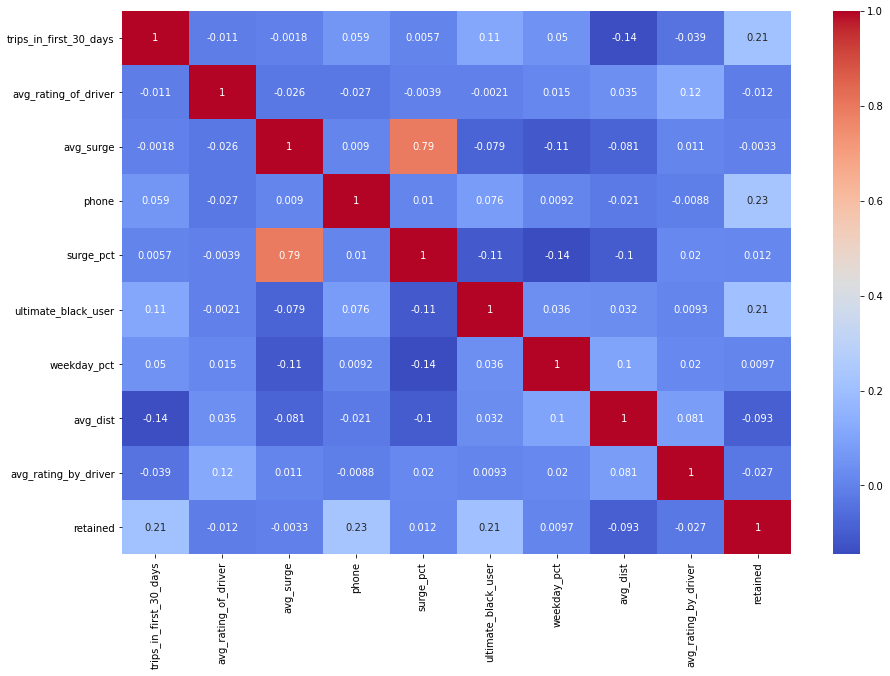

In [24]:
import seaborn as sns

# Visualize the correlations between each of the variables on a heatmap
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm');

### From the heatmap we can see avg_surge and surge_pct have a high positive correlation which makes sense because both increase or decrease at the same time. <br><br> Interesting things to notice is there is a slight positive correlation with: <br> 1. ultimate_black_user and retained <br> 2. trips_in_first_30_day and retained <br> 3. phone and retained

## We can begin to build a predictive model now with 'retained' as the target variable, since the signup dates are in January and 6 months after is the month of June.

In [25]:
# drop any rows that have at least 1 null value
df.dropna(inplace=True)

In [26]:
# Check new retained percentage to see if target variable became imbalanced (it did not)
df['retained'].mean()

0.4110291299348409

In [27]:
# "onehotencode" cities feature
cities = pd.get_dummies(df['city'])
df['Astapor'] = cities['Astapor']
df["King's Landing"] = cities["King's Landing"]
df['Winterfell'] = cities['Winterfell']
df.drop(columns='city', axis=1, inplace=True)

In [28]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# we do not want to keep signup_date or last_trip_date because these are related to how the target variable retained was created
X = df.drop(columns=['retained', 'signup_date', 'last_trip_date'])

y = df['retained']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

logr = LogisticRegression()

logr_model = logr.fit(X_train, y_train)

y_pred_logr = logr.predict(X_test)

print(classification_report(y_test, y_pred_logr))

print('The accuracy score is:', accuracy_score(y_test, y_pred_logr))
print('The precision score is:', precision_score(y_test, y_pred_logr))
print('The recall score is:', recall_score(y_test, y_pred_logr))
print('The f1_score is:', f1_score(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      7346
           1       0.67      0.55      0.61      5178

    accuracy                           0.70     12524
   macro avg       0.70      0.68      0.68     12524
weighted avg       0.70      0.70      0.70     12524

The accuracy score is: 0.7040083040562121
The precision score is: 0.6741652853421738
The recall score is: 0.5498261877172653
The f1_score is: 0.6056802467822572


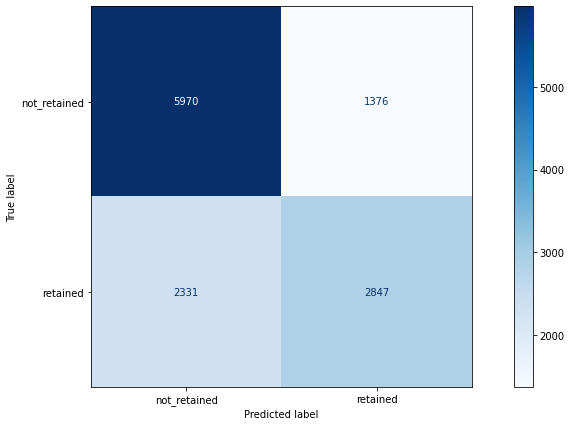

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr_model, X_test, y_test, display_labels=['not_retained', 'retained'], cmap=plt.cm.Blues, normalize=None);

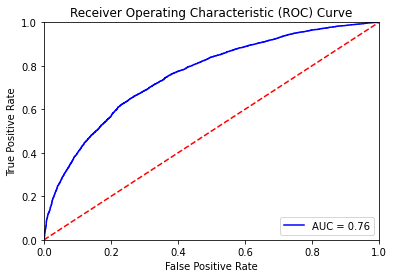

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature: 0, Score: 0.42281
Feature: 1, Score: -0.02078
Feature: 2, Score: -0.04407
Feature: 3, Score: 0.50273
Feature: 4, Score: 0.08390
Feature: 5, Score: 0.43553
Feature: 6, Score: 0.00275
Feature: 7, Score: -0.19487
Feature: 8, Score: -0.06684
Feature: 9, Score: -0.30159
Feature: 10, Score: 0.42268
Feature: 11, Score: -0.06270


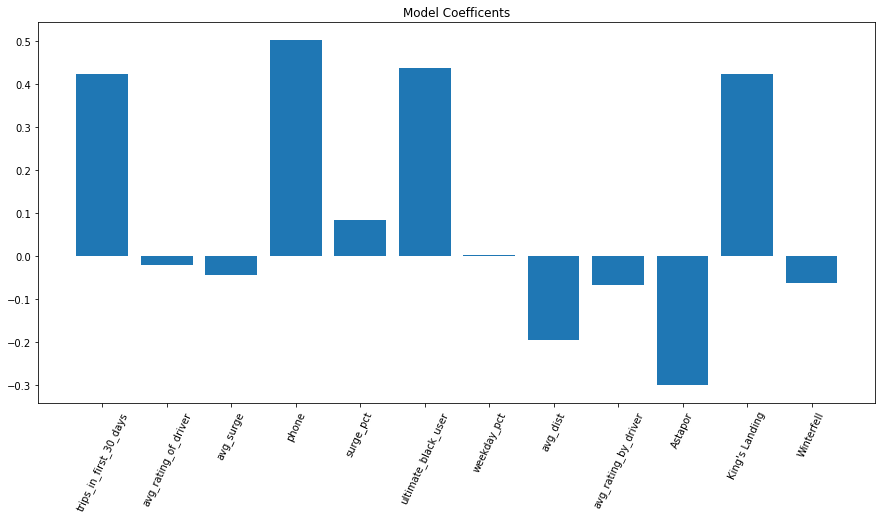

In [33]:
# get importance
importance = logr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(0, 12), labels=list(X.columns), rotation=65)
plt.title('Model Coefficents')
plt.show()

### For this project, I decided to use a logistic regression model because of its simplicity and the binary nature of the target variable. From the confusin matrix and metric scores such as recall, it is obvious that the model is misclassifying many 'retained' users as 'not retained'.  One thing that can be done to improve recall would be to adjust the threshold on which the predicted probability from the model is used to classify a user as retained. This is probably not ideal though, because it would increase the amount of false positives and cause the precision to decrease. <br><br> Based on the roc curve and the auc score of 0.76 we know that our model has some predictive power, but it could be better. I also plotted the model coefficients, and this can be used to tell us that there were 6 features ('trips_in_first_30_days', 'phone', 'ultimate_black_user', 'avg_dist', 'Astapor', 'King's Landing') that had a bigger effect on whether a user would be classified as retained or not. An alternative would be to retrain the model with only the features that had high coefficients and see if model performance increases. Another thing that could also be done is onehotencode the 'phone' feature to see if iPhone or Android users tend to use Ultimate more.

### Using these insights gained from the model, Ultimate could offer promotions to new users and users that have stopped logging in such as discounted ultimate black rides or discounted rides for the first 30 days. This will promote people to use Ultimate's services more in the beginning and they will like the product more and continue to use it in the future. Also, since there was a couple thousand users who had not left driver reviews, then discounts could be offered as an incentive for rating drivers. This could give a better idea for rider retention, because if riders are unhappy with their driver then they are less likely to use Ultimate again in the future.